In [1]:
import matplotlib.pyplot as plt
#Pyplot is a collection of functions in the popular visualization package Matplotlib. 
#Its functions manipulate elements of a figure, such as creating a figure, creating a plotting area, plotting lines, adding plot labels, etc.
import matplotlib.image as mpimg
#With Pillow installed, you can also use the Matplotlib library to load the image and display it within a Matplotlib frame. 
#This can be achieved using the imread() function that loads the image an array of pixels directly and the imshow() function that will display an array of pixels as an image.

In [7]:
# reading in an image
image = mpimg.imread('/Users/sk/Desktop/AVLD/solidWhiteCurve.jpg')

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


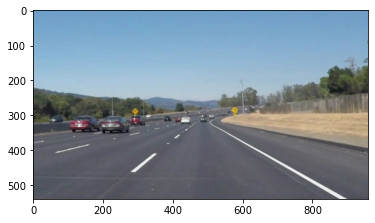

(540, 960, 3)

In [16]:
# printing out some stats and plotting the image
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)
plt.show()
image.shape
#An ndarray is a (usually fixed-size) multidimensional container of items of the same type and size. 
#The number of dimensions and items in an array is defined by its shape , which is a tuple of N non-negative integers that specify the sizes of each dimension.

In [2]:
import numpy as np
import cv2

In [4]:
def region_of_interest(img, vertices):
    # Define a blank matrix that matches the image height/width.
    mask = np.zeros_like(img)
    # Retrieve the number of color channels of the image.
    channel_count = img.shape[2]
    # Create a match color with the same color channel counts.
    match_mask_color = (255,) * channel_count
      
    # Fill inside the polygon
    cv2.fillPoly(mask, vertices, match_mask_color)
    
    # Returning the image only where mask pixels match
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
height = image.shape[0]
width = image.shape[1]
region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),
]

image = mpimg.imread('/Users/sk/Desktop/AVLD/solidWhiteCurve.jpg')
cropped_image = region_of_interest(
    image,
    np.array([region_of_interest_vertices], np.int32),
)
plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

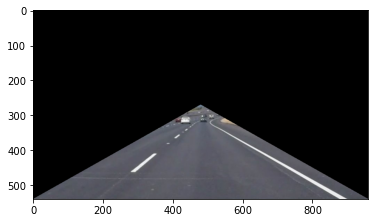

In [14]:
plt.imshow(cropped_image)
plt.show()

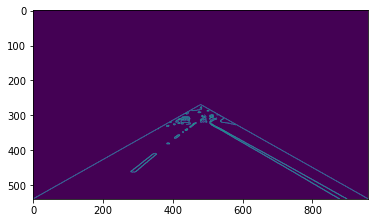

In [20]:
# Convert to grayscale here.
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)
# Call Canny Edge Detection here.
cannyed_image = cv2.Canny(gray_image, 100, 200)
plt.figure()
plt.imshow(cannyed_image)
plt.show()

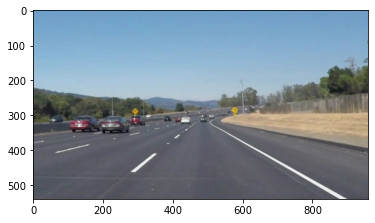

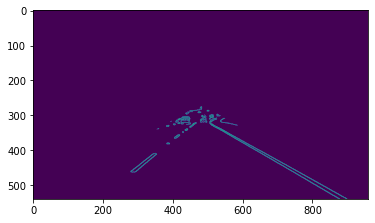

In [22]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255 # <-- This line altered for grayscale.
    
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),
]
image = mpimg.imread('/Users/sk/Desktop/AVLD/solidWhiteCurve.jpg')
plt.figure()
plt.imshow(image)
plt.show()
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 100, 200)
# Moved the cropping operation to the end of the pipeline.
cropped_image = region_of_interest(
    cannyed_image,
    np.array([region_of_interest_vertices], np.int32)
)
plt.figure()
plt.imshow(cropped_image)
plt.show()

In [23]:
image = mpimg.imread('/Users/sk/Desktop/AVLD/solidWhiteCurve.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 200, 300)
cropped_image = region_of_interest(
    cannyed_image,
    np.array(
        [region_of_interest_vertices],
        np.int32
    ),
)
lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)
print(lines)

[[[486 312 877 538]]

 [[724 441 831 502]]

 [[641 397 693 424]]

 [[482 311 562 352]]

 [[290 463 353 412]]

 [[385 382 483 311]]

 [[281 459 349 409]]

 [[769 466 885 532]]

 [[487 313 878 539]]

 [[386 382 487 309]]]


In [114]:
def draw_lines(img, lines, thickness=5):
# If there are no lines to draw, exit.
    if lines is None:
            return
# Make a copy of the original image.
    img = np.copy(image)
# Create a blank image that matches the original in size.
    line_img = np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
# Loop over all lines and draw them on the blank image.
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), thickness=5)
# Merge the image with the lines onto the original.
    img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
    return img
# Return the modified image.

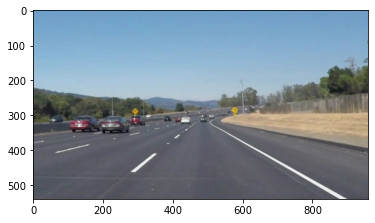

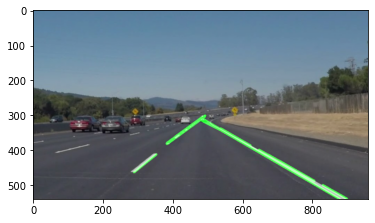

In [115]:
image = mpimg.imread('/Users/sk/Desktop/AVLD/solidWhiteCurve.jpg')
plt.figure()
plt.imshow(image)
plt.show()
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(
    cannyed_image,
    np.array(
        [region_of_interest_vertices],
        np.int32
    ),
)
lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)
line_image = draw_lines(image, lines, thickness=5) # <---- Add this call.
plt.figure()
plt.imshow(line_image)
plt.show()

In [75]:
import math
left_line_x = []
left_line_y = []
right_line_x = []
right_line_y = []
for line in lines:
    for x1, y1, x2, y2 in line:
        slope = (y2 - y1) / (x2 - x1) # <-- Calculating the slope.
        if math.fabs(slope) < 0.5: # <-- Only consider extreme slope
            continue
        if slope <= 0: # <-- If the slope is negative, left group.
            left_line_x.extend([x1, x2])
            left_line_y.extend([y1, y2])
        else: # <-- Otherwise, right group.
            right_line_x.extend([x1, x2])
            right_line_y.extend([y1, y2])

In [76]:
min_y = image.shape[0] * (3 / 5) # <-- Just below the horizon
max_y = image.shape[0] # <-- The bottom of the image

In [77]:
poly_left = np.poly1d(np.polyfit(
    left_line_y,
    left_line_x,
    deg=1
))
left_x_start = int(poly_left(max_y))
left_x_end = int(poly_left(min_y))
poly_right = np.poly1d(np.polyfit(
    right_line_y,
    right_line_x,
    deg=1
))
right_x_start = int(poly_right(max_y))
right_x_end = int(poly_right(min_y))

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt2'. Sequence item with index 1 has a wrong type
>  - Can't parse 'pt2'. Sequence item with index 1 has a wrong type


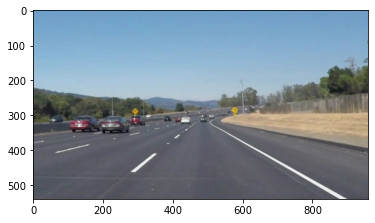

In [123]:
image = mpimg.imread('/Users/sk/Desktop/AVLD/solidWhiteCurve.jpg')
plt.figure()
plt.imshow(image)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(
    cannyed_image,
    np.array([region_of_interest_vertices],np.int32))
lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)

left_line_x = []
left_line_y = []
right_line_x = []
right_line_y = []
for line in lines:
    for x1, y1, x2, y2 in line:
        slope = (y2 - y1) / (x2 - x1) # <-- Calculating the slope.
        if math.fabs(slope) < 0.5: # <-- Only consider extreme slope
            continue
        if slope <= 0: # <-- If the slope is negative, left group.
            left_line_x.extend([x1, x2])
            left_line_y.extend([y1, y2])
        else: # <-- Otherwise, right group.
            right_line_x.extend([x1, x2])
            right_line_y.extend([y1, y2])
min_y = image.shape[0] * (3 / 5) # <-- Just below the horizon
max_y = image.shape[0] # <-- The bottom of the image
poly_left = np.poly1d(np.polyfit(
    left_line_y,
    left_line_x,
    deg=1
))

left_x_start = int(poly_left(max_y))
left_x_end = int(poly_left(min_y))

poly_right = np.poly1d(np.polyfit(
    right_line_y,
    right_line_x,
    deg=1
))

right_x_start = int(poly_right(max_y))
right_x_end = int(poly_right(min_y))

line_image = draw_lines(
    image,
    [[
        [left_x_start, max_y, left_x_end, min_y],
        [right_x_start, max_y, right_x_end, min_y],
    ]],
    thickness=5,
)

plt.figure()
plt.imshow(line_image)
plt.show()